In [4]:
import pandas as pd
cars = pd.read_csv('ToyotaCorolla - MLR.csv')
cars

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [16]:
missing_values = cars.isnull().sum()
missing_values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

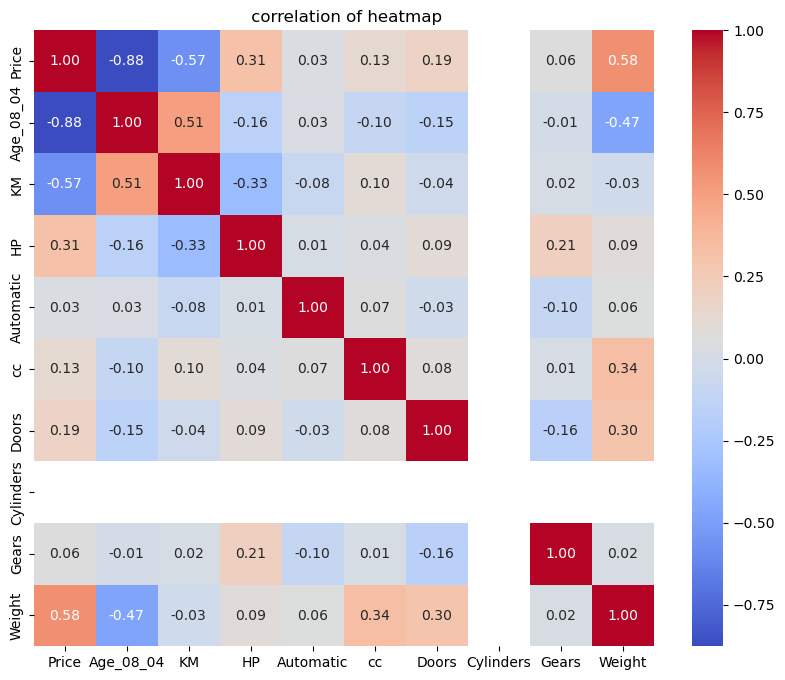

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cars = cars.select_dtypes(include = [np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cars.corr(), annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title(" correlation of heatmap")
plt.show()

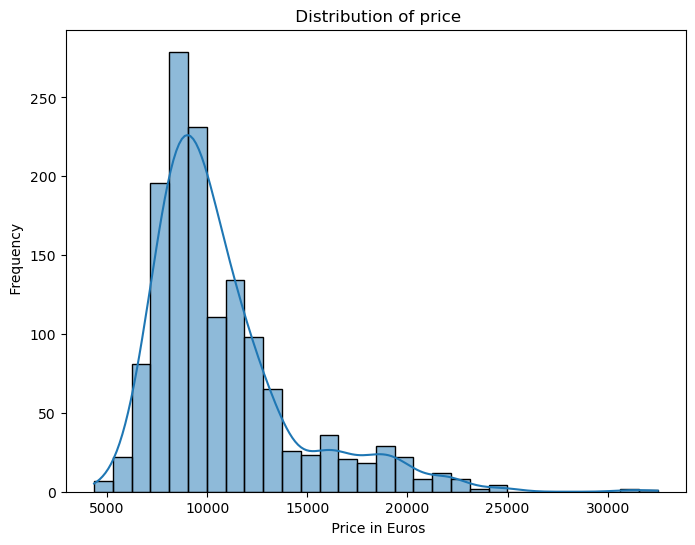

In [30]:
plt.figure(figsize =(8,6))
sns.histplot(cars['Price'], bins=30, kde=True)
plt.title(' Distribution of price')
plt.xlabel(' Price in Euros')
plt.ylabel(' Frequency')
plt.show()


In [40]:
#Encoding categorical values


cars_encoded = pd.get_dummies(cars, columns=['Fuel_Type'], drop_first=True)


X = cars_encoded.drop('Price', axis=1)
y = cars_encoded['Price']



In [54]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=40)


In [58]:
#model1

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

print("Coefficient", model1.coef_)
print('Intercept', model1.intercept_)



Coefficient [-1.29022797e+02 -1.65765736e-02  2.36498393e+01  3.82361105e+02
 -1.13022678e-02 -1.62759642e+01  1.70530257e-13  6.02051698e+02
  1.77465431e+01  9.93573835e+02  1.46145279e+03]
Intercept -6703.047165152433


In [60]:
y_pred = model1.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1768877.1743117357
R^2 Score: 0.8732073572841969


In [62]:
#model2

#building additional model, adding interaction between terms

X_train['KM_HP'] = X_train['KM'] * X_train['HP']
X_test['KM_HP'] = X_test['KM'] * X_test['HP']

model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

mse2 = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mearsquareerror', mse)
print('r2_score', r2)



mearsquareerror 1768877.1743117357
r2_score 0.8732073572841969


In [74]:
#lasso & ridge

from sklearn.linear_model import Lasso,Ridge

lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

print("mse_lasso", mse_lasso)
print('r2_lasso',r2_lasso)



mse_lasso 1726643.5624375937
r2_lasso 0.8762346512866985


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R^2 Score:", r2_ridge)

Ridge Regression - Mean Squared Error: 1735180.8050743188
Ridge Regression - R^2 Score: 0.8756227040180378


In [ ]:
#Summary

*Mean of all KM is highest 68533.259749
*Age to price is more negatively correlated.
*Age to Km is positively correlated.
* Histogram plot shows positively skewed data and more frequency lies between 5000 and 10000
*All the model built are good models with score of approximately 0.87

